In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import r2_score, mean_squared_error, max_error
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import lightgbm as lgb

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/hidden_test.csv')

train

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [3]:
pd.set_option('display.max_columns', 55)

In [4]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

In [5]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,248.387400,250.191800,248.064900,249.992200,251.642200,249.678600,-0.079268,0.505215,0.492200,245.823600,249.164800,250.119100,250.483700,7.510013,7.422919,7.524276,7.480496,7.542805,7.486749,7.543878,7.470930,7.487228,7.463924,7.480095,7.463081,7.501495,7.563922,7.529382,7.573613,7.504179,7.516057,7.521130,7.454040,7.583621,7.488388,7.447334,7.541466,7.456547,7.354651,7.449582,7.446619,7.519481,7.510101,7.422179,7.488576,7.526853,7.449717,7.438931,7.563141,7.510016,7.465383,7.503378,7.503662
std,144.124521,144.850399,144.792255,144.015371,144.745324,144.677689,7.032273,0.285678,0.499964,142.852057,144.878226,145.632335,144.900116,4.337977,4.314456,4.359013,4.313662,4.360080,4.343422,4.326001,4.351735,4.342221,4.350220,4.316420,4.333474,4.283716,4.337939,4.325639,4.324341,4.318745,4.327828,4.329726,4.325633,4.340549,4.335361,4.335703,4.339896,4.327846,4.315967,4.355657,4.345184,4.324215,4.327507,4.335234,4.321760,4.340501,4.328863,4.308985,4.347630,4.353635,4.363206,4.338020,4.291431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000534,0.000735,0.001009,0.002425,0.001938,0.001878,0.000098,0.000112,0.000134,0.000407,0.003713,0.002003,0.000726,0.001153,0.000978,0.000612,0.004882,0.000117,0.005182,0.000698,0.000538,0.000012,0.000360,0.001679,0.000674,0.000438,0.002563,0.001193,0.002578,0.001920,0.000310,0.001103,0.000545,0.001244,0.000026,0.001580,0.000286,0.001716,0.000834,0.000132
25%,123.000000,123.000000,123.000000,128.000000,125.000000,124.000000,-7.071068,0.261199,0.000000,122.000000,123.000000,124.000000,125.000000,3.726694,3.699220,3.705847,3.746302,3.714119,3.705049,3.839919,3.624898,3.709006,3.698120,3.789745,3.711264,3.788748,3.824283,3.832993,3.838422,3.829372,3.777752,3.744229,3.714690,3.787502,3.704058,3.685488,3.793690,3.694083,3.575156,3.658494,3.639790,3.805628,3.810208,3.707353,3.758763,3.762664,3.711092,3.753059,3.805891,3.734299,3.696070,3.758126,3.810301
50%,249.000000,251.000000,246.000000,252.000000,252.000000,249.000000,-1.000000,0.507519,0.000000,244.000000,249.000000,252.000000,251.000000,7.562736,7.395801,7.512628,7.505363,7.552075,7.480087,7.613453,7.477880,7.476664,7.396711,7.443644,7.494765,7.464284,7.590579,7.496124,7.627596,7.525663,7.523263,7.598453,7.436733,7.624858,7.478955,7.340204,7.506271,7.478763,7.302234,7.476156,7.383178,7.528164,7.507894,7.371637,7.531310,7.550432,7.361451,7.377399,7.627437,7.547184,7.441250,7.500340,7.429109
75%,373.000000,377.000000,375.000000,373.000000,379.000000,374.000000,7.071068,0.750603,1.000000,368.000000,374.000000,378.000000,376.000000,11.269315,11.149947,11.332802,11.194596,11.322267,11.265878,11.224627,11.254231,11.282292,11.277635,11.268109,11.207078,11.197466,11.340517,11.301186,11.279402,11.213183,11.273499,11.253210,11.151100,11.321960,11.246703,11.278194,11.364622,11.214660,11.071916,11.245962,11.229083,11.235955,11.271190,11.147130,11.193657,11.311366,11.201442,11.154313,11.338666,11.276399,11.297861,11.268075,11.209570
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999982,1.000000,499.000000,499.000000,499.0

In [20]:
train.isnull().sum(), test.isnull().sum()

(0         0
 1         0
 2         0
 3         0
 4         0
 5         0
 6         0
 7         0
 8         0
 9         0
 10        0
 11        0
 12        0
 13        0
 14        0
 15        0
 16        0
 17        0
 18        0
 19        0
 20        0
 21        0
 22        0
 23        0
 24        0
 25        0
 26        0
 27        0
 28        0
 29        0
 30        0
 31        0
 32        0
 33        0
 34        0
 35        0
 36        0
 37        0
 38        0
 39        0
 40        0
 41        0
 42        0
 43        0
 44        0
 45        0
 46        0
 47        0
 48        0
 49        0
 50        0
 51        0
 52        0
 target    0
 dtype: int64,
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31 

In [6]:
train.dtypes

0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6         float64
7         float64
8           int64
9           int64
10          int64
11          int64
12          int64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

<AxesSubplot:>

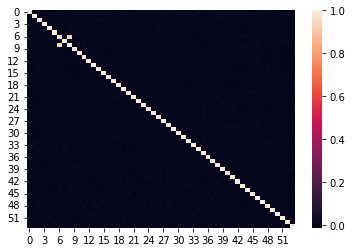

In [7]:
corr = train.corr()
sns.heatmap(corr)

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

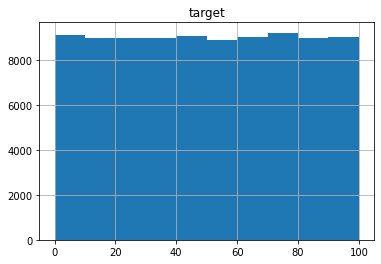

In [8]:
train.hist(column = 'target')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

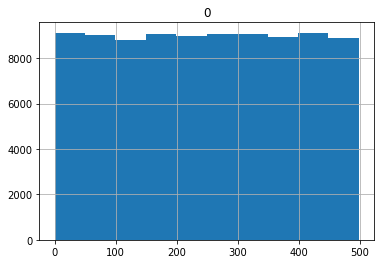

In [9]:
train.hist(column = '0')

In [10]:
y = train['target']
X = train.drop(columns='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=46)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73800, 53), (16200, 53), (73800,), (16200,))

In [12]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
55354,261,42,367,117,377,222,6.082763,0.485557,1,464,99,232,465,8.580286,7.353213,6.516172,4.584388,2.244957,14.883246,9.199720,11.694550,11.709898,7.002341,7.920960,3.803917,4.098722,0.466005,9.218466,3.153780,4.062985,9.513417,2.697709,8.774458,14.845761,10.197361,7.252821,14.136296,9.602764,7.388451,2.027007,13.284383,1.852888,1.557367,14.795423,10.476144,12.133526,13.892417,5.094915,0.613813,4.451061,2.900195,10.752696,12.315502
46554,61,299,203,172,204,199,-8.185353,0.378117,0,95,231,78,226,14.807371,11.491842,14.375942,8.091511,2.079927,9.559879,4.805444,1.687524,10.929184,13.303342,3.071601,7.097140,2.101921,5.133983,14.847609,5.041912,10.272799,12.150274,4.863027,3.777224,14.237461,1.324114,1.184393,10.596359,13.496880,13.813674,12.884766,2.923867,7.392769,14.959711,4.419380,10.665207,0.582927,3.936493,10.941356,5.077282,6.079973,8.566959,7.190159,13.383577
33591,437,476,375,2,41,424,-8.062258,0.423718,0,76,298,188,366,13.942023,14.440786,6.650599,14.109040,2.463360,1.012133,2.188105,2.236665,13.434614,6.856783,4.199745,14.478737,11.724708,14.954769,13.405037,8.598566,11.810181,5.471486,12.826116,1.121150,12.541484,12.821875,9.363741,0.768051,14.982613,7.379301,5.015060,12.265978,9.566937,0.062884,4.248141,7.789097,14.754174,4.869560,8.152679,1.215280,5.795255,12.332219,10.636102,13.669088
18504,451,409,48,471,435,148,-6.928203,0.849703,0,305,41,41,100,9.193356,10.598831,8.312711,4.069629,9.080522,1.823760,3.711076,5.097655,11.155292,7.353899,9.304932,1.948396,8.854477,10.995728,12.623436,0.801580,0.690011,6.626336,10.313754,2.455326,11.715848,10.145465,12.094737,10.170267,6.804414,14.874668,13.149451,14.595330,11.468204,5.970630,11.889284,11.964552,4.756458,7.321516,7.175678,4.428122,9.794052,1.814044,0.171472,4.378633
41477,435,223,141,159,148,232,-8.544004,0.005865,0,361,9,215,470,10.690836,4.136644,3.290570,13.401816,6.174658,12.640209,14.609379,9.738805,12.413374,10.182789,8.977448,9.309672,6.331774,2.437346,12.154417,11.543511,10.617321,13.627560,4.063220,4.412180,0.409273,7.018997,13.809204,14.879798,13.865129,4.281416,3.498570,5.926151,11.305058,10.563747,12.968257,6.908390,12.849607,11.493272,12.078814,10.007463,8.116083,1.825312,10.424319,2.558487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84410,309,471,98,149,90,29,8.717798,0.351095,1,18,424,1,441,1.262390,12.133116,3.011939,8.432133,10.192854,3.663869,8.980898,12.494444,14.852081,10.643064,9.241579,9.731655,2.651103,7.137877,0.401621,7.648402,2.962020,8.339904,11.674717,3.900805,3.249941,2.385982,0.849372,7.728972,4.687400,7.203230,7.666549,7.434350,11.121186,12.052486,0.459433,11.890340,5.949278,10.593338,0.642418,6.500272,9.488298,4.120103,3.539209,5.902268
56692,243,355,21,235,296,200,1.000000,0.666095,1,70,474,162,420,6.764658,4.512629,8.777038,3.247870,11.568826,7.339065,7.984097,5.039182,1.393354,7.646106,0.467765,0.778063,8.255327,3.469884,13.283239,13.369077,10.184550,5.399019,9.908957,11.609627,11.766238,4.615865,9.376165,5.130443,7.263885,10.855987,8.667804,5.061864,12.323613,1.221982,4.138076,13.013956,9.009363,11.630538,8.226901,14.096252,3.356852,14.045358,7.254697,9.972976
30248,499,238,272,267,337,298,-1.414214,0.877426,0,354,218,459,152,0.449826,6.779787,13.230656,6.222451,13.337783,2.179024,11.140548,14.450704,12.983258,9.587167,6.284516,8.255812,0.738973,12.908678,12.317502,7.510908,12.149904,11.619405,2.980672,1.948423,4.189098,6.504502,7.074430,12.905230,3.705491,10.324300,2.371794,4.869105,14.380806,5.315529,2.574882,4.294991,4.195636,9.770955,4.278692,0.479077,13.648927,14.673820,0.987267,5.195374
88901,98,326,168,312,485,464,-7.874008,0.610254,0,143,86,3,238,13.307354,11.261254,3.983686,8.443274,5.897971,11.288568,0.9

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[ 0.08045557, -1.44484711,  0.82310936, ..., -1.06470971,
         0.75549303,  1.10866427],
       [-1.30479511,  0.34027018, -0.31718751, ...,  0.24577213,
        -0.06822508,  1.35515739],
       [ 1.29947616,  1.56970894,  0.8787336 , ...,  1.11651699,
         0.72853458,  1.4210482 ],
       ...,
       [ 1.72890387, -0.0834347 ,  0.16257154, ...,  1.65802977,
        -1.50243768, -0.53453655],
       [-1.04852374,  0.52781169, -0.56054355, ...,  0.15546616,
        -0.28810601, -0.21796775],
       [ 0.10123433,  1.11822013,  1.1846669 , ...,  0.06862952,
         1.00811928,  1.62346672]])

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Model score(r2 error): {model.score(X_test, y_test)}')

Model score(r2 error): -0.0010754037513307502


In [24]:
y_pred_lin = model.predict(X_test)
print(f'Model RMSE: {mean_squared_error(y_test, y_pred_lin, squared=False)}')

Model RMSE: 28.881250587736208


In [25]:
svm = LinearSVR(epsilon=0.5, tol=0.00001, C=0.1, loss='epsilon_insensitive', random_state=11)
svm.fit(X_train, y_train)
print(f'Model score(r2 error): {svm.score(X_test, y_test)}')

y_pred_svm = svm.predict(X_test)
print(f'Model RMSE: {mean_squared_error(y_test, y_pred_svm, squared=False)}')

Model score(r2 error): -0.008280509538051817
Model RMSE: 28.984998705503493


In [30]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.0001,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.7,
#     'bagging_freq': 10,
#     'verbose': 0,
    "max_depth": 16,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 500
}

In [33]:
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's l1: 22.4863	valid_0's l2: 674.954
[2]	valid_0's l1: 20.238	valid_0's l2: 546.758
[3]	valid_0's l1: 18.2154	valid_0's l2: 442.925
[4]	valid_0's l1: 16.3947	valid_0's l2: 358.809
[5]	valid_0's l1: 14.7562	valid_0's l2: 290.673
[6]	valid_0's l1: 13.2812	valid_0's l2: 235.467
[7]	valid_0's l1: 11.954	valid_0's l2: 190.759
[8]	valid_0's l1: 10.7595	valid_0's l2: 154.54
[9]	valid_0's l1: 9.68448	valid_0's l2: 125.202
[10]	valid_0's l1: 8.71686	valid_0's l2: 101.434
[11]	valid_0's l1: 7.84582	valid_0's l2: 82.1755
[12]	valid_0's l1: 7.06205	valid_0's l2: 66.5821
[13]	valid_0's l1: 6.35669	valid_0's l2: 53.9432
[14]	valid_0's l1: 5.72165	valid_0's l2: 43.7048
[15]	valid_0's l1: 5.15014	valid_0's l2: 35.4133
[16]	valid_0's l1: 4.6356	valid_0's l2: 28.6924
[17]	valid_0's l1: 4.17251	valid_0's l2: 23.2484
[18]	valid_0's l1: 3.75598	valid_0's l2: 18.8377
[19]	valid_0's l1: 3.38092	valid_0's l2: 15.2656
[20]	valid_0's l1: 3.04344	valid_0's l2: 12.3707
[21]	valid_0's l1: 2.73963	valid_

[165]	valid_0's l1: 0.010584	valid_0's l2: 0.000188825
[166]	valid_0's l1: 0.0105846	valid_0's l2: 0.000188866
[167]	valid_0's l1: 0.0105849	valid_0's l2: 0.000188872
[168]	valid_0's l1: 0.0105875	valid_0's l2: 0.000188907
[169]	valid_0's l1: 0.0105822	valid_0's l2: 0.00018875
[170]	valid_0's l1: 0.0105843	valid_0's l2: 0.000188825
[171]	valid_0's l1: 0.0105866	valid_0's l2: 0.000188872
[172]	valid_0's l1: 0.0105877	valid_0's l2: 0.000188873
[173]	valid_0's l1: 0.0105871	valid_0's l2: 0.000188871
[174]	valid_0's l1: 0.010588	valid_0's l2: 0.000188868
[175]	valid_0's l1: 0.0105823	valid_0's l2: 0.0001887
[176]	valid_0's l1: 0.0105832	valid_0's l2: 0.000188701
[177]	valid_0's l1: 0.0105858	valid_0's l2: 0.000188774
[178]	valid_0's l1: 0.0105858	valid_0's l2: 0.000188779
[179]	valid_0's l1: 0.0105857	valid_0's l2: 0.000188742
[180]	valid_0's l1: 0.0105857	valid_0's l2: 0.000188769
[181]	valid_0's l1: 0.0105863	valid_0's l2: 0.000188795
[182]	valid_0's l1: 0.0105875	valid_0's l2: 0.0001888

[322]	valid_0's l1: 0.0106405	valid_0's l2: 0.00019024
[323]	valid_0's l1: 0.0106406	valid_0's l2: 0.000190243
[324]	valid_0's l1: 0.0106405	valid_0's l2: 0.000190229
[325]	valid_0's l1: 0.01064	valid_0's l2: 0.00019023
[326]	valid_0's l1: 0.0106412	valid_0's l2: 0.000190236
[327]	valid_0's l1: 0.0106369	valid_0's l2: 0.000190144
[328]	valid_0's l1: 0.0106384	valid_0's l2: 0.000190188
[329]	valid_0's l1: 0.0106398	valid_0's l2: 0.000190235
[330]	valid_0's l1: 0.0106403	valid_0's l2: 0.000190254
[331]	valid_0's l1: 0.0106409	valid_0's l2: 0.000190267
[332]	valid_0's l1: 0.0106408	valid_0's l2: 0.000190259
[333]	valid_0's l1: 0.0106425	valid_0's l2: 0.000190285
[334]	valid_0's l1: 0.0106427	valid_0's l2: 0.000190268
[335]	valid_0's l1: 0.0106431	valid_0's l2: 0.000190275
[336]	valid_0's l1: 0.0106434	valid_0's l2: 0.000190282
[337]	valid_0's l1: 0.0106432	valid_0's l2: 0.00019032
[338]	valid_0's l1: 0.0106444	valid_0's l2: 0.000190353
[339]	valid_0's l1: 0.0106459	valid_0's l2: 0.0001903

[471]	valid_0's l1: 0.0106552	valid_0's l2: 0.000190746
[472]	valid_0's l1: 0.0106567	valid_0's l2: 0.00019077
[473]	valid_0's l1: 0.0106566	valid_0's l2: 0.000190765
[474]	valid_0's l1: 0.0106562	valid_0's l2: 0.000190763
[475]	valid_0's l1: 0.010657	valid_0's l2: 0.000190775
[476]	valid_0's l1: 0.0106572	valid_0's l2: 0.00019079
[477]	valid_0's l1: 0.0106575	valid_0's l2: 0.000190765
[478]	valid_0's l1: 0.0106582	valid_0's l2: 0.000190799
[479]	valid_0's l1: 0.0106574	valid_0's l2: 0.000190759
[480]	valid_0's l1: 0.0106583	valid_0's l2: 0.00019078
[481]	valid_0's l1: 0.0106594	valid_0's l2: 0.000190801
[482]	valid_0's l1: 0.0106597	valid_0's l2: 0.000190814
[483]	valid_0's l1: 0.0106606	valid_0's l2: 0.000190842
[484]	valid_0's l1: 0.0106557	valid_0's l2: 0.000190697
[485]	valid_0's l1: 0.0106551	valid_0's l2: 0.000190668
[486]	valid_0's l1: 0.0106555	valid_0's l2: 0.000190657
[487]	valid_0's l1: 0.0106548	valid_0's l2: 0.00019064
[488]	valid_0's l1: 0.010655	valid_0's l2: 0.00019067

LGBMRegressor(max_bin=512, max_depth=16, metric=['l1', 'l2'],
              num_iterations=500, num_leaves=128, objective='regression',
              task='train')

In [34]:
print(f'Model score(r2 error): {gbm.score(X_test, y_test)}')

y_pred_gbm = gbm.predict(X_test)
print(f'Model RMSE: {mean_squared_error(y_test, y_pred_gbm, squared=False)}')

Model score(r2 error): 0.9999997734759412
Model RMSE: 0.013738514187946351


In [65]:
pd.DataFrame(y_pred_gbm).to_csv("a.csv", index=None)

In [58]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], batch_size=32, epochs=15, validation_split=0.2)

# # Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test)
# test_loss

Epoch 1/15
2307/2307 [==============================] - 1s 515us/step - loss: 380.0100 - mae: 12.7281 - val_loss: 11.9479 - val_mae: 2.7342
Epoch 2/15
2307/2307 [==============================] - 1s 497us/step - loss: 5.5354 - mae: 1.8096 - val_loss: 2.6553 - val_mae: 1.2914
Epoch 3/15
2307/2307 [==============================] - 1s 483us/step - loss: 1.7639 - mae: 1.0382 - val_loss: 1.3620 - val_mae: 0.9128
Epoch 4/15
2307/2307 [==============================] - 1s 494us/step - loss: 1.0437 - mae: 0.7987 - val_loss: 0.8759 - val_mae: 0.7353
Epoch 5/15
2307/2307 [==============================] - 1s 492us/step - loss: 0.7661 - mae: 0.6753 - val_loss: 0.8158 - val_mae: 0.7086
Epoch 6/15
2307/2307 [==============================] - 1s 496us/step - loss: 0.6512 - mae: 0.6118 - val_loss: 0.5063 - val_mae: 0.5602
Epoch 7/15
2307/2307 [==============================] - 1s 494us/step - loss: 0.5830 - mae: 0.5780 - val_loss: 0.3537 - val_mae: 0.4656
Epoch 8/15
2307/2307 [======================

In [59]:
# print(f'Model score(r2 error): {model.score(X_test, y_test)}')

y_pred_nn = model.predict(X_test)
print(f'Model RMSE: {mean_squared_error(y_test, y_pred_nn, squared=False)}')

507/507 [==============================] - 0s 233us/step
Model RMSE: 0.5632165418443765
